<a href="https://colab.research.google.com/github/kwnstantinosRoumeliwtis/ML_course/blob/main/ML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Εργασία 2 – Δέντρα Απόφασης & Τυχαία Δάση**


# Όνομα: Κωνσταντίνος Ρουμελιώτης
# ΑΕΜ: 190
# ΠΜΣ: AI

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# 1)

In [20]:
df = pd.read_csv('water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [21]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


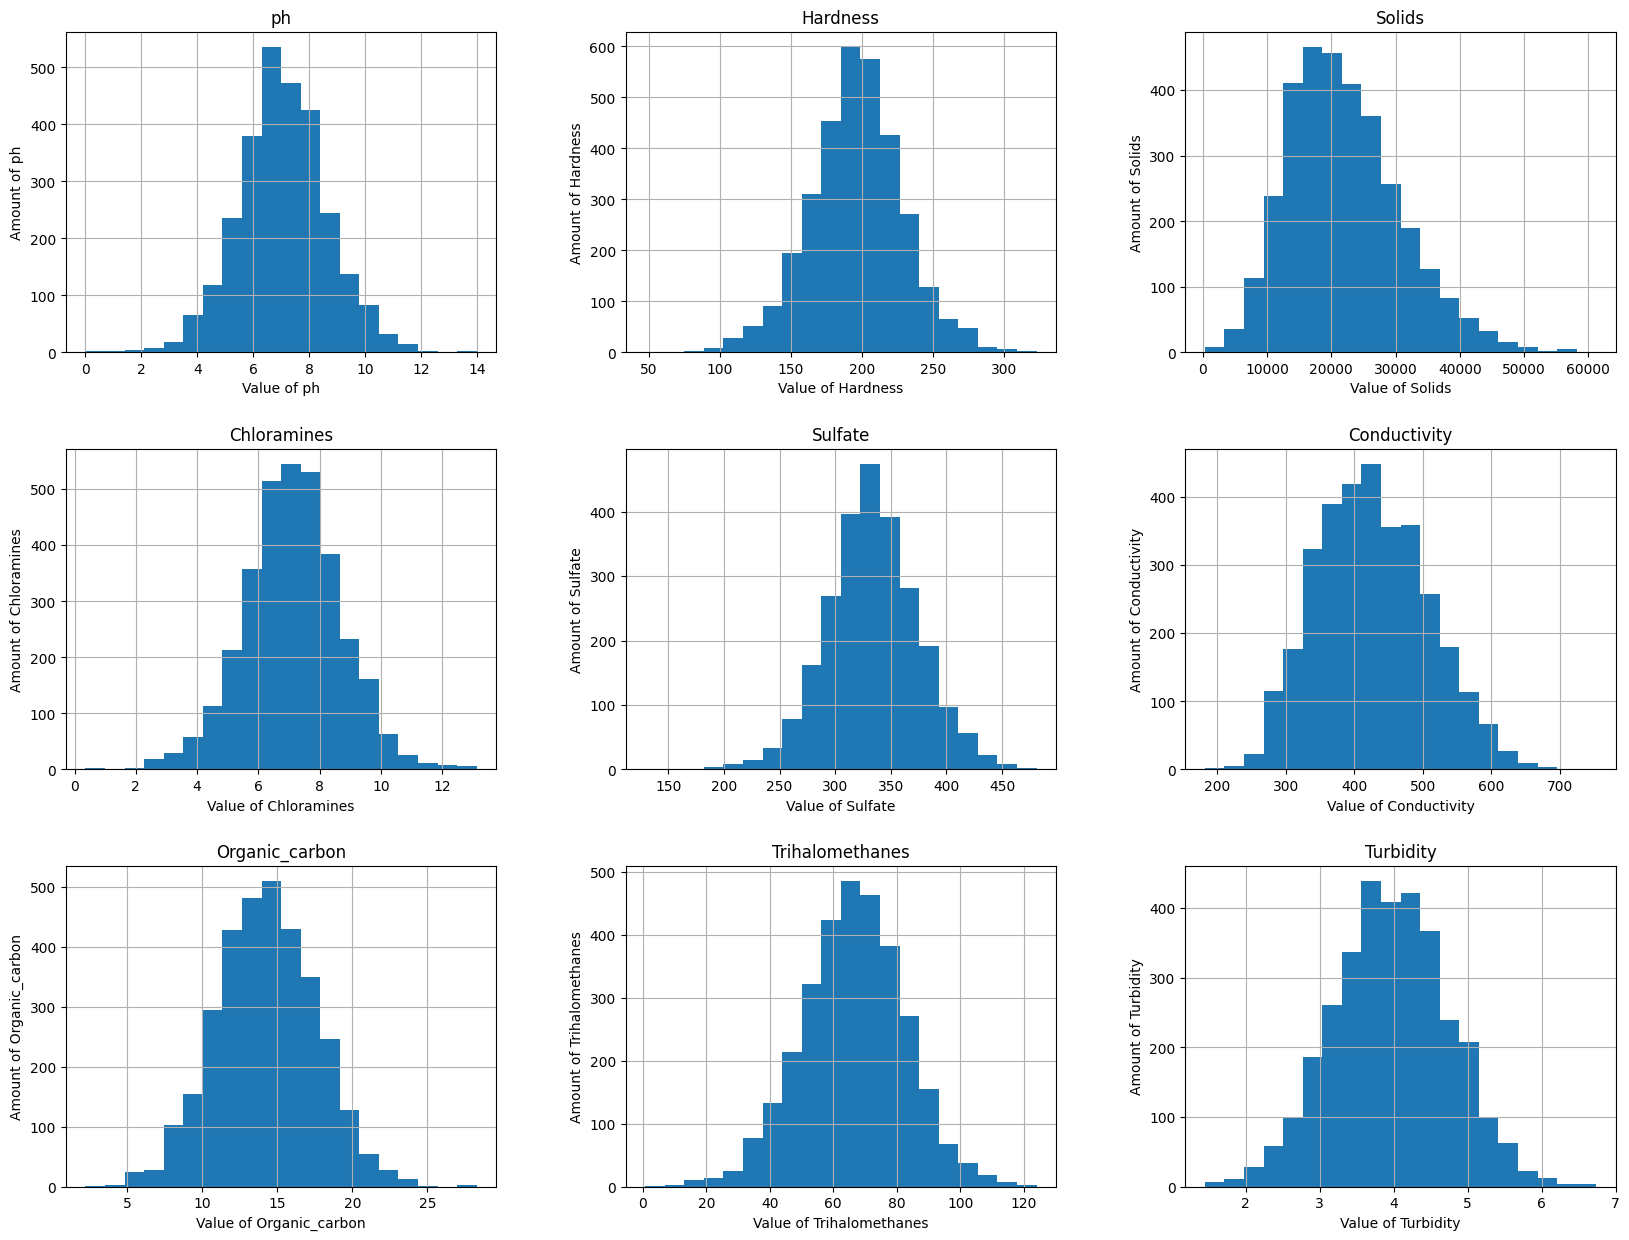

In [22]:
i=0
fields = df.columns
histograms = df.iloc[:,:9].hist(bins=20, figsize=(20,15))
for ax in histograms.flatten():
    ax.set_xlabel(f"Value of {fields[i]}")
    ax.set_ylabel(f"Amount of {fields[i]}")
    i+=1

Potability
0    1998
1    1278
Name: count, dtype: int64


Text(0.5, 1.0, 'Count the binary values of Potability')

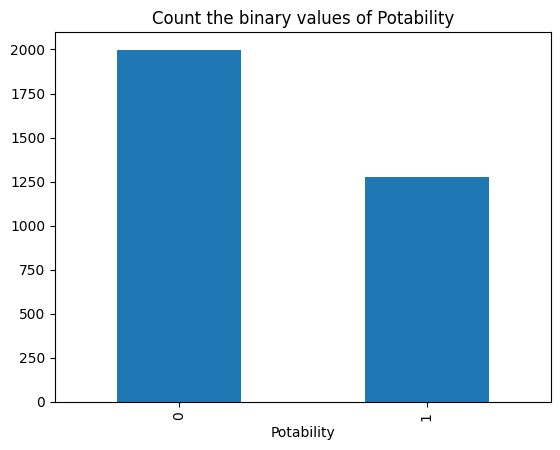

In [23]:
count = df["Potability"].value_counts()
print(count)
count.plot(kind="bar" )
plt.title("Count the binary values of Potability")

In [24]:
nan_per_column = df.isna().sum()
print(nan_per_column)

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [25]:
print(f'The percentage of no potability in dataset is {round(count[0]/len(df)*100, 2)}%\nThe percentage of potability is {100-round(count[0]/len(df)*100, 2)} % ')

The percentage of no potability in dataset is 60.99%
The percentage of potability is 39.01 % 


Η ποιότητα των δεδομένων δεν είναι καλή. Εκτός από το γεγονός ότι τα δεδομένα δεν είναι κανονικοποιημένα, λείπουν αρκετές τιμές σε 3 μεταβλητές όπως δείξαμε πιο πάνω.

# 2)

In [26]:
potable_1=len(df[(df["ph"]<6.5) & (df["Potability"]==1)])
potable_2=len(df[(df["ph"]>=6.5) & (df["ph"]<=8.5) & (df["Potability"]==1)])
potable_3=len(df[(df["ph"]>8.5)  & (df["Potability"]==1)])
no_potable_1=len(df[(df["ph"]<6.5) & (df["Potability"]==0)])
no_potable_2=len(df[(df["ph"]>=6.5) & (df["ph"]<=8.5) & (df["Potability"]==0)])
no_potable_3=len(df[(df["ph"]>8.5)  & (df["Potability"]==0)])
total1=potable_1+no_potable_1
total2=potable_2+no_potable_2
total3=potable_3+no_potable_3

print(f'for range <6.5 potable water is {round(potable_1/total1*100, 2)}% and non potable water is {round(no_potable_1/total1*100, 2)}%\nfor range >=6.5 and <=8.5 potable water is {round(potable_2/total2*100, 2)}% and non potable water is {round(no_potable_2/total2*100, 2)}%\nfor range >8.5 potable water is {round(potable_3/total3*100, 2)}% and non potable water is {round(no_potable_3/total3*100, 2)}% ')



for range <6.5 potable water is 36.78% and non potable water is 63.22%
for range >=6.5 and <=8.5 potable water is 43.9% and non potable water is 56.1%
for range >8.5 potable water is 33.13% and non potable water is 66.87% 


Ναι επαληθεύεται η ιδιότητα ότι το μεγαλύτερο ποσοστό πόσιμου νερού βρίσκεται στο εύρος 6.5-8.5 με ποσοστό 43.9%

# 3)

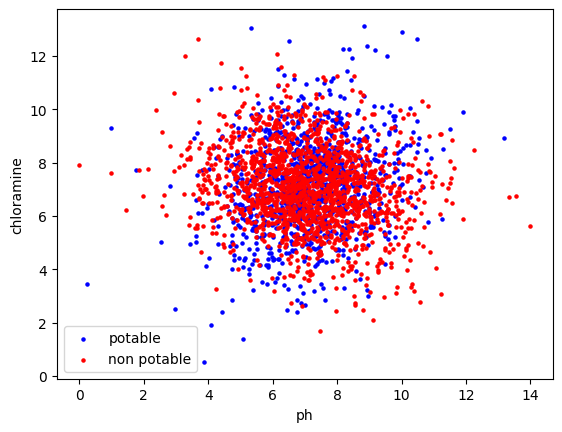

In [27]:
plt.scatter(df[df["Potability"]==1].iloc[:,0],df[df["Potability"]==1].iloc[:,3],color='b', label="potable", s=5)
plt.scatter(df[df["Potability"]==0].iloc[:,0],df[df["Potability"]==0].iloc[:,3],color='r', label="non potable", s=5)
plt.xlabel("ph")
plt.ylabel("chloramine")
plt.legend()
plt.show()


Το πόσιμο νερό έχει υψηλή συγκέντρωση για τα επίπεδα ph 5-8.5, με χλωραμίνη περίπου 4.5-8.5 και έχει λιγότερες τιμές έως 4 σε επίπεδα χλωραμίνης. Γεγονός που σημαίνει ότι τα επίπεδα χλωραμίνης δεν πληρούν στην πλειοψηφία τους τις προτεινόμενες τιμές από τον ΠΟΥ. Δεν υπάρχει καλή διαχωρισιμότητα.

# 4)

In [28]:
df=df.fillna(-1)
df.isna().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


# 5)

In [29]:
dataset = df.drop(columns=["Potability"])
target = df["Potability"]
x = dataset.to_numpy()
y = target.to_numpy()
x.shape, y.shape

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((2293, 9), (2293,), (983, 9), (983,))

# 6)

In [30]:
model=DecisionTreeClassifier(random_state=0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_tr_pred = model.predict(x_train)
print(f'Accuracy score for test data is {round(accuracy_score(y_test, y_pred),2)*100}%\nAccuracy score for train data is {round(accuracy_score(y_train, y_tr_pred),2)*100}%')


Accuracy score for test data is 59.0%
Accuracy score for train data is 100.0%


# 7)

In [31]:
criterion=["gini","entropy"]
cr=[]
max_depth=[None,3,5]
md=[]
min_samples_split=[2,5]
mss=[]
min_samples_leaf=[1,2]
msl=[]
max_features=[None,"sqrt"]
mf=[]
cost_complexity_pruning_path=[0,0.01]
ccpp=[]
train_accuracy=[]
test_accuracy=[]

for i in range(len(criterion)):
  for j in range(len(max_depth)):
    for k in range(len(min_samples_split)):
      for l in range(len(min_samples_leaf)):
        for m in range(len(max_features)):
          for n in range(len(cost_complexity_pruning_path)):
            model=DecisionTreeClassifier(criterion=criterion[i],max_depth=max_depth[j],min_samples_split=min_samples_split[k],min_samples_leaf=min_samples_leaf[l],max_features=max_features[m],ccp_alpha=cost_complexity_pruning_path[n])
            model.fit(x_train, y_train)
            y_pred = model.predict(x_test)
            test_accuracy.append(round(accuracy_score(y_test, y_pred),2)*100)
            y_tr_pred = model.predict(x_train)
            train_accuracy.append(round(accuracy_score(y_train, y_tr_pred),2)*100)
            cr.append(criterion[i])
            md.append(max_depth[j])
            mss.append(min_samples_split[k])
            msl.append(min_samples_leaf[l])
            mf.append(max_features[m])
            ccpp.append(cost_complexity_pruning_path[n])
data={
    'TrainAccuracy': train_accuracy,
    'TestAccuracy': test_accuracy,
    'Criterion': cr,
    'MaxDepth': md,
    'MinSamplesSplit': mss,
    'MinSamplesLeaf': msl,
    'MaxFeatures': mf,
    'CostComplexityPruning': ccpp
}
matrix = pd.DataFrame(data)
matrix

,TrainAccuracy,TestAccuracy,Criterion,MaxDepth,MinSamplesSplit,MinSamplesLeaf,MaxFeatures,CostComplexityPruning
0,100.0,59.0,gini,NaN,2,1,None,0.00
1,61.0,62.0,gini,NaN,2,1,None,0.01
2,100.0,56.0,gini,NaN,2,1,sqrt,0.00
3,61.0,62.0,gini,NaN,2,1,sqrt,0.01
4,95.0,60.0,gini,NaN,2,2,None,0.00
...,...,...,...,...,...,...,...,...
91,61.0,62.0,entropy,5.0,5,1,sqrt,0.01
92,63.0,63.0,entropy,5.0,5,2,None,0.00
93,61.0,62.0,entropy,5.0,5,2,None,0.01
94,63.0,63.0,entropy,5.0,5,2,sqrt,0.00


# 8)

In [32]:
array=matrix[matrix["MaxDepth"]==3]
array.loc[array["TestAccuracy"].idxmax()]

,30
TrainAccuracy,62.0
TestAccuracy,63.0
Criterion,gini
MaxDepth,3.0
MinSamplesSplit,5
MinSamplesLeaf,2
MaxFeatures,sqrt
CostComplexityPruning,0.0


[Text(0.5, 0.875, 'x[4] <= 409.753\ngini = 0.478\nsamples = 2293\nvalue = [1388, 905]'),
 Text(0.25, 0.625, 'x[4] <= 301.782\ngini = 0.475\nsamples = 2230\nvalue = [1366, 864]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[3] <= 5.705\ngini = 0.49\nsamples = 913\nvalue = [521, 392]'),
 Text(0.0625, 0.125, 'gini = 0.494\nsamples = 177\nvalue = [79, 98]'),
 Text(0.1875, 0.125, 'gini = 0.48\nsamples = 736\nvalue = [442.0, 294.0]'),
 Text(0.375, 0.375, 'x[0] <= 7.809\ngini = 0.46\nsamples = 1317\nvalue = [845, 472]'),
 Text(0.3125, 0.125, 'gini = 0.473\nsamples = 962\nvalue = [593, 369]'),
 Text(0.4375, 0.125, 'gini = 0.412\nsamples = 355\nvalue = [252.0, 103.0]'),
 Text(0.75, 0.625, 'x[7] <= 49.125\ngini = 0.455\nsamples = 63\nvalue = [22, 41]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[2] <= 7915.983\ngini = 0.142\nsamples = 13\nvalue = [1, 12]'),
 Text(0.5625, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 10\nvalue

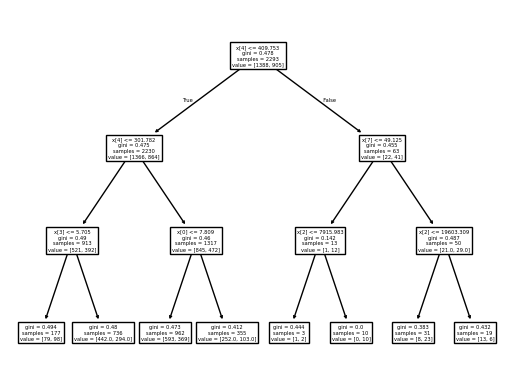

In [33]:
model=DecisionTreeClassifier(criterion="gini",max_depth=3,min_samples_split=5,min_samples_leaf=2,max_features="sqrt",ccp_alpha=0)
model.fit(x_train, y_train)
tree.plot_tree(model)

# 9)

In [34]:
matrix.loc[matrix["TestAccuracy"].idxmax()]
model=DecisionTreeClassifier(criterion="gini",max_depth=5,min_samples_split=2,min_samples_leaf=1,max_features=None,ccp_alpha=0)
model.fit(x_train, y_train)


DecisionTreeClassifier(ccp_alpha=0, max_depth=5)

[0.27045638 0.11198992 0.17284596 0.04742923 0.29379755 0.05220669
 0.         0.02068716 0.03058711] Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')


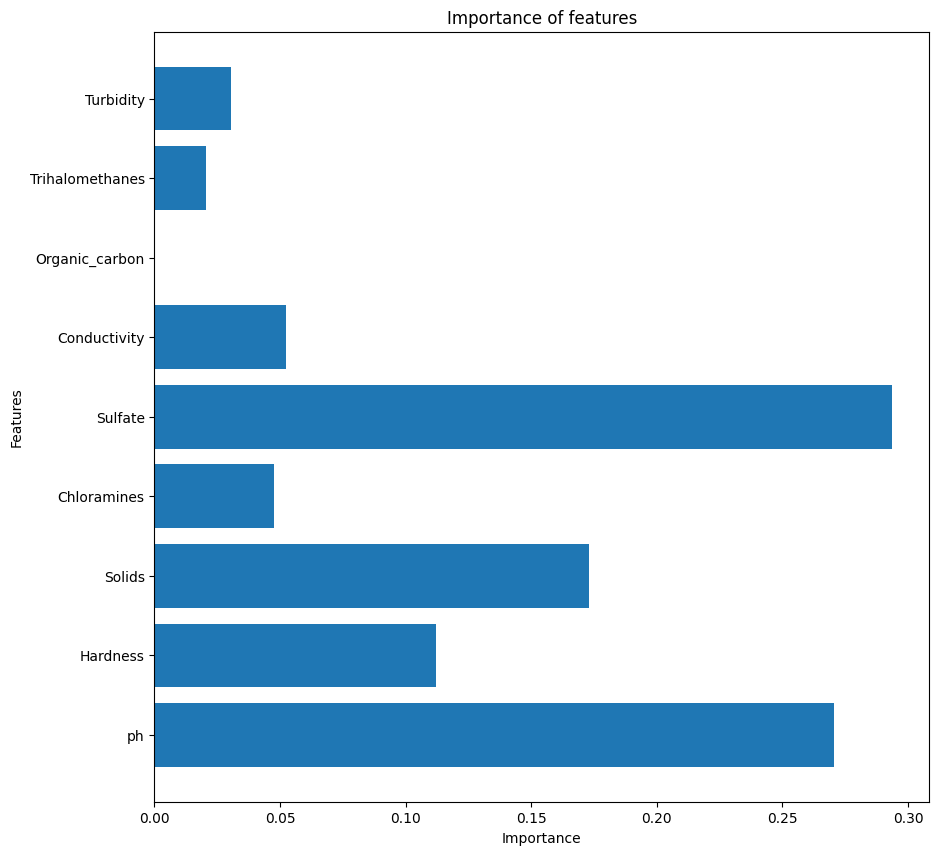

In [35]:
coeffs = model.feature_importances_
importance_weights = np.abs(coeffs)
print(importance_weights, dataset.columns)
plt.figure(figsize=(10, 10))
plt.barh(dataset.columns, importance_weights)
plt.title('Importance of features')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

Οι πιο σημαντικές μεταβλητές που θα κρατούσα θα ήταν conductivity, hardness, Solids, ph και Sulfate. Αν το μοντέλο μας ήταν γραμμική ή λογιστική παλινδρόμηση θα μπορούσε να κάνει καλύτερη εξαγωγή της σημαντικότητας των χαρακτηριστικών γιατί ειναι παραμετρικές μέθοδοι που συσχετίζουν συναρτησιακά τις σχέσεις των ανεξάρτητων μεταβλητών και δεν κάνουν απλά αναζήτηση.

# 10)

Ένα τυχαίο δάσος θα μπορούσε να έχει καλύτερη απόδοση από ένα δέντρο απόφασης, διότι έχει πολλά δέντρα απόφασης, γεγονός που του δίνει τη δυνατότητα να μειώνει το θόρυβο και να αποφεύγει το overfitting που παρατηρήσαμε ότι έχει το δέντρο απόφασης στην εργασία(100% ακρίβεια train, 59% test). Έχει δηλαδή τη δυνατότητα να κάνει καλή γενίκευση στα άγνωστα δεδομένα. Στο τυχαίο δάσος που αποτελείται από πολλά δέντρα, υπάρχει η δυνατότητα κάθε δέντρο να εκπαιδεύεται σε τυχαία υποσύνολα δεδομένων και έτσι μπορεί να παίρνει αποφάσεις με βάση το τι λέει η πλειοψηφία των δέντρων και όχι μόνο 1 που εκπαιδεύεται στα ίδια δεδομένα.

# 11)

In [36]:
estimators=[50,100,200]
for i in range(0,3):
  model=RandomForestClassifier(random_state=0,n_estimators=estimators[i])
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  y_tr_pred = model.predict(x_train)
  print(f'for estimators = {estimators[i]}\nAccuracy score for test data is {round(accuracy_score(y_test, y_pred),2)*100}%\nAccuracy score for train data is {round(accuracy_score(y_train, y_tr_pred),2)*100}%')

for estimators = 50
Accuracy score for test data is 67.0%
Accuracy score for train data is 100.0%
for estimators = 100
Accuracy score for test data is 67.0%
Accuracy score for train data is 100.0%
for estimators = 200
Accuracy score for test data is 67.0%
Accuracy score for train data is 100.0%


# 12)

Το καλύτερο για το μοντέλο μας είναι να προβλέπει καλά το μη πόσιμο νερό και ας ταξινομεί στο μη πόσιμο, πόσιμο νερό παρά το αντίθετο, διότι στην πρώτη περίπτωση μειώνεται η πιθανότητα ο κόσμος που θα πιεί το νερό να παρουσιάσει προβληματα υγείας. Το κόστος θα είναι οικονομικό για τις λάθος περιπτώσεις. Στην αντίθετη περίπτωση αν ταξινομείται λανθασμένα μη πόσιμο νερό στην κατηγορία του πόσιμου, εκεί αυξάνεται η πιθανότητα στον πληθυσμό που θα το χρησιμοποιήσει να παρουσιάσει προβλήματα υγείας.

# 13)

Το πιο ασφαλές για την εταιρεία θα ήταν να χρησιμοποιήσει τυχαία δάση αντί για δέντρα απόφασης, καθώς όπως περιγράψαμε παραπάνω ο αλγόριθμος των τυχαίων δασών πετυχαίνει καλύτερο accuracy, λόγω του πλήθους των δέντρων αποτρέπει εν μέρει το overfitting και έχει περισσότερη ανεκτικότητα στον θόρυβο. Έχει τη δυνατότητα να εκπαιδεύεται σε διαφορετικά υποσύνολα δεδομένων και οι αποφάσεις του να είναι πιο δίκαιες, δεδομένου ότι αποφασίζει η πλειοψηφία των δέντρων και όχι ένα δέντρο.